### CNN on Fashion MNIST

In [1]:
from tensorflow import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
import scipy as sp
import tensorflow as tf
from keras import backend as K
from keras_preprocessing import image
from IPython.display import Image, display
import matplotlib.cm as cm
tf.compat.v1.disable_eager_execution()
import cv2

### Loading data

In [2]:
(X_train,Y_train),(X_test,Y_test)  = fashion_mnist.load_data()

### Preprocessing Data

In [3]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
# Normalize the pixel values from 0 to 1
X_train = X_train/255
X_test  = X_test/255
#to float
X_train = X_train.astype('float')
X_test  = X_test.astype('float')


In [4]:
def show_img(img):
    img  = np.array(img,dtype='float')
    img = img.reshape((28,28))
    plt.imshow(img)

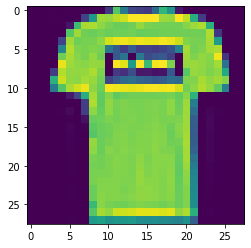

In [5]:
show_img(X_train[1])

In [6]:
model = Sequential()
model.add(Conv2D(16,input_shape=(28,28,1),kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         7

### Compiling model

In [7]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

# train the model. just run a few epochs for this test run. you can adjust later.
model.fit(X_train,Y_train,batch_size=32, epochs=5, validation_split=0.1, shuffle=True)

Train on 54000 samples, validate on 6000 samples


2022-12-11 16:53:05.707492: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 16:53:05.717926: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 16:53:05.718710: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 16:53:05.720312: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/5


2022-12-11 16:53:07.243470: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


54000/54000 [==============================] - ETA: 0s - loss: 0.5290 - accuracy: 0.8027

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


54000/54000 [==============================] - 8s 145us/sample - loss: 0.5290 - accuracy: 0.8027 - val_loss: 0.3459 - val_accuracy: 0.8698
Epoch 2/5
54000/54000 [==============================] - 7s 121us/sample - loss: 0.3223 - accuracy: 0.8813 - val_loss: 0.3119 - val_accuracy: 0.8813
Epoch 3/5
54000/54000 [==============================] - 6s 114us/sample - loss: 0.2743 - accuracy: 0.8989 - val_loss: 0.2890 - val_accuracy: 0.8918
Epoch 4/5
54000/54000 [==============================] - 7s 130us/sample - loss: 0.2432 - accuracy: 0.9100 - val_loss: 0.2784 - val_accuracy: 0.8992
Epoch 5/5
54000/54000 [==============================] - 6s 115us/sample - loss: 0.2169 - accuracy: 0.9195 - val_loss: 0.2512 - val_accuracy: 0.9068


In [8]:
print(model.layers[-3].name)
#print(model.layers[-3].name)
print(model.layers[-1].name)
print(model.layers[-1].activation)

conv2d_4
dense
<function softmax at 0x7fc0a5bf7ef0>


In [9]:
last_dense = model.layers[-1]
last_dense_weights = last_dense.get_weights()
gap_weights = last_dense_weights[0]
print("gap_weights_l index 0 contains weights ", last_dense_weights[0].shape)
print("gap_weights_l index 1 contains biases ", last_dense_weights[1].shape)

gap_weights_l index 0 contains weights  (256, 10)
gap_weights_l index 1 contains biases  (10,)


In [10]:
#print layers
for l in range(len(model.layers)):
    print(l, model.layers[l])

0 <keras.layers.convolutional.Conv2D object at 0x7fc096e87fd0>
1 <keras.layers.pooling.MaxPooling2D object at 0x7fc096ee0a90>
2 <keras.layers.convolutional.Conv2D object at 0x7fc0a5c01110>
3 <keras.layers.pooling.MaxPooling2D object at 0x7fc09657ce90>
4 <keras.layers.convolutional.Conv2D object at 0x7fc096ee82d0>
5 <keras.layers.pooling.MaxPooling2D object at 0x7fc09658c990>
6 <keras.layers.convolutional.Conv2D object at 0x7fc0965838d0>
7 <keras.layers.pooling.MaxPooling2D object at 0x7fc096583050>
8 <keras.layers.convolutional.Conv2D object at 0x7fc096515f90>
9 <keras.layers.pooling.GlobalAveragePooling2D object at 0x7fc096527f90>
10 <keras.layers.core.Dense object at 0x7fc096e4eb90>


In [11]:
#get features
getFeature = K.function([model.layers[0].input, K.learning_phase()],
                        [model.layers[9].output])

In [12]:
train_X = getFeature([X_train, 0])[0]
test_X = getFeature([X_test, 0])[0]

In [13]:
test_X.shape

(10000, 256)

In [14]:
train_X.shape

(60000, 256)

In [15]:
from sklearn.svm import SVC
svmclf = SVC(C=10,kernel='rbf',gamma="auto",probability = True)
svmclf.fit(train_X,Y_train)

SVC(C=10, gamma='auto', probability=True)

In [16]:
Y_pred = svmclf.predict(test_X)

In [17]:
print(Y_pred.shape)

(10000,)


In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.87      0.87      1000
           3       0.91      0.92      0.92      1000
           4       0.85      0.88      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.72      0.74      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.91      0.92      0.91     10000



## Predicting image taken from Google

### Preprocessing google image

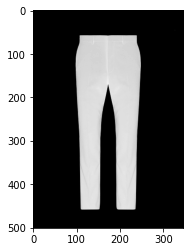

In [36]:
def preprocess(trouser_image, t_image_size):
    img = tf.expand_dims(trouser_image, -1)       # from 28 x 28 to 28 x 28 x 1 
    img = tf.divide(img, 255)           # normalize 
    img = tf.image.resize(img,          # resize acc to the input
             [t_image_size, t_image_size])
    img = tf.reshape(img,               # reshape to add batch dimension 
            [1, t_image_size, t_image_size, 1])
    return img
img = cv2.imread('/kaggle/input/trouserimage/trouserimage2.jpg', 0)  #grayscale image
img = cv2.bitwise_not(img)
plt.imshow(img, cmap="gray")
plt.show()
img = preprocess(img, 28) 

### Creating CAM model

In [20]:
# creating cam model
cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
cam_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0     

In [21]:
features,_ = cam_model.predict(X_test)
results = svmclf.predict(test_X)
print(results.shape)
print(features.shape)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


(10000,)
(10000, 1, 1, 256)


In [22]:
print(type(X_test))

<class 'numpy.ndarray'>


In [23]:
idx = 0
img_features = features[idx,:,:,:]

print(f"The features for image index {idx} has shape (height, width, num of feature channels) : ", img_features.shape)

The features for image index 0 has shape (height, width, num of feature channels) :  (1, 1, 256)


In [24]:
features_for_img_scaled = sp.ndimage.zoom(img_features, (28/3, 28/3,1), order=2) #scale features to original image hxw
print("features_for_img_scaled up to 28 by 28 height and width:", features_for_img_scaled.shape)

features_for_img_scaled up to 28 by 28 height and width: (9, 9, 256)


In [25]:
features_for_img_scaled = sp.ndimage.zoom(img_features, (28/3, 28/3,1), order=2) #scale features to original image hxw
print("features_for_img_scaled up to 28 by 28 height and width:", features_for_img_scaled.shape)
class_id = 0
gap_weights_for_one_class = gap_weights[:,class_id]
print("features_for_img_scaled has shape ", features_for_img_scaled.shape)
print("gap_weights_for_one_class has shape ", gap_weights_for_one_class.shape)
cam = np.dot(features_for_img_scaled, gap_weights_for_one_class)
print("class activation map shape ", cam.shape)

features_for_img_scaled up to 28 by 28 height and width: (9, 9, 256)
features_for_img_scaled has shape  (9, 9, 256)
gap_weights_for_one_class has shape  (256,)
class activation map shape  (9, 9)


### CAM

In [26]:
# https://github.com/y33-j3T/Coursera-Deep-Learning/blob/master/Advanced%20Computer%20Vision%20with%20TensorFlow/Week%204%20-%20Visualization%20and%20Interpretability/Copy%20of%20C3_W4_Lab_1_FashionMNIST-CAM.ipynb
def show_cam(test_img,features_for_img,results):
  # get the class with the highest output probability
    prediction = np.argmax(results)
    class_activation_weights = gap_weights[:, prediction]
    class_activation_features = sp.ndimage.zoom(features_for_img, (28, 28, 1), order=2)
    cam_output  = np.dot(class_activation_features,class_activation_weights)
    print('Predicted Class = ' +str(prediction))
    test_img = test_img.reshape((28,28))
    print(test_img.shape)
    plt.imshow(test_img, alpha=0.5)
    #if results[prediction]>0.95:
        #print("green")
    cmap_str = 'Reds'
    #else:
        #print("red")
        #cmap_str = 'Reds'
    plt.imshow(cam_output, cmap=cmap_str, alpha=0.5)
    plt.show()


### Run show_cam with preprocessed google images

[[ 0.16069904  0.2051855   0.13830656  0.08345777  0.11523289  0.0375183
   0.18300316 -0.0068561   0.06824257  0.01521032]]
Predicted Class = 1
(28, 28)


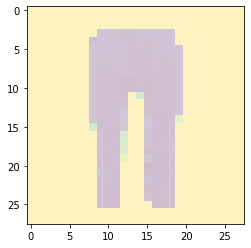

In [35]:
Image_Path = '/kaggle/input/trouserimage/trouserimage2.jpg'
Img = image.load_img(Image_Path, target_size = (28,28),color_mode='grayscale')
Img_Array = image.img_to_array(Img)
#print(type(Img_Array))
#print(Img_Array.shape)
Img_Array /= 255
Img_Array = np.asarray(Img_Array).reshape((1, 28, 28, 1))
#print(Img_Array.shape)
features, _ = cam_model.predict(Img_Array)
Img_feat = getFeature([Img_Array, 0])[0]
#print(Img_feat)

results = svmclf.decision_function(Img_feat)
res_sum = np.sum(results)
results = results / res_sum
print(results)
show_cam(test_img=Img_Array,
         features_for_img=features.squeeze(axis=0),
         results=results)

(28, 28)


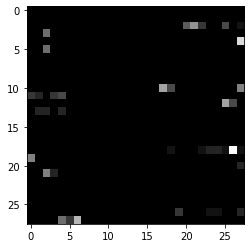

(1, 28, 28, 1)
[[ 0.18745855  0.09111641  0.18740712  0.08373954  0.06222326  0.16110604
   0.13152854  0.01704087  0.08426617 -0.00588649]]
Predicted Class = 0
(28, 28)


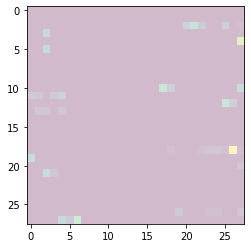

In [52]:
img1 = cv2.imread('/kaggle/input/dress-pencil/dress_pencil.jfif', 0)
img1.resize(28,28)
print(img1.shape)
img1 = cv2.bitwise_not(img1)
plt.imshow(img1, cmap="gray")
plt.show()
img1 = np.asarray(img1).reshape((1, 28, 28, 1))
print(img1.shape)
features, _ = cam_model.predict(img1)
img2 = getFeature([img1, 0])[0]
results = svmclf.decision_function(img2)
res_sum = np.sum(results)
results = results / res_sum
print(results)
show_cam(test_img=img1,
         features_for_img=features.squeeze(axis=0),
         results=results.squeeze(axis=0))

In [37]:
features, _ = cam_model.predict(img)

ValueError: When using data tensors as input to a model, you should specify the `steps` argument.